Image loaded. Dimensions: (1024, 1024)
Data Type: float64


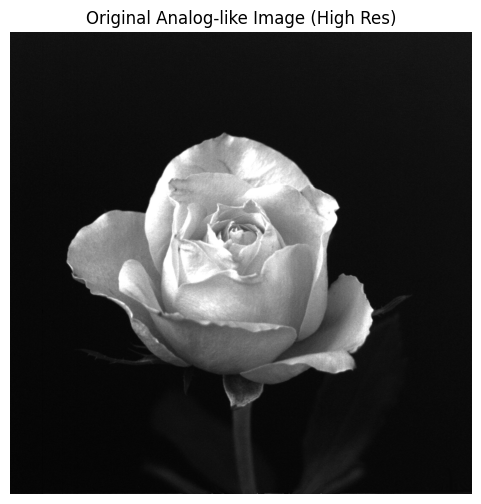

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import requests

# --- 1. LOAD THE IMAGE ---
img_raw = Image.open("rose.tif") 
# ------------------------------------------------

# Convert to a numpy array 
# We normalize it to 0-1 range immediately for easier math, just like the previous lab
image_array = np.array(img_raw) / 255.0

print(f"Image loaded. Dimensions: {image_array.shape}")
print(f"Data Type: {image_array.dtype}")

# Display the original
plt.figure(figsize=(6, 6))
plt.imshow(image_array, cmap='gray', vmin=0, vmax=1)
plt.title("Original Analog-like Image (High Res)")
plt.axis('off')
plt.show()

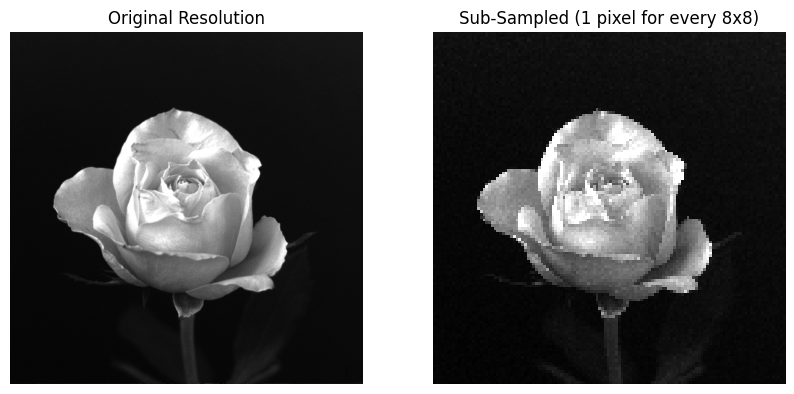

In [18]:
def reduce_sampling(img, factor):
    """
    Simulates lowering the spatial sampling rate.
    factor: How many pixels to skip (both in x and y directions). 
            1 = Original
            10 = Keep only every 10th pixel (Low res)
    """
    # Slicing the array: [Start:Stop:Step]
    # We take every 'nth' pixel in both vertical (rows) and horizontal (cols) directions
    sampled_img = img[::factor, ::factor]
    return sampled_img

# --- EXPERIMENT ---
factor = 8  # Try changing this to 4, 8, 16, 32

low_res_rose = reduce_sampling(image_array, factor)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Resolution")
plt.axis('off')

plt.subplot(1, 2, 2)
# We use 'nearest' interpolation to show the pixels sharply (the blocky effect)
# Also try the following alternatives for interpolation: 
# 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
# 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
# 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
plt.imshow(low_res_rose, cmap='gray', interpolation='none') 
plt.title(f"Sub-Sampled (1 pixel for every {factor}x{factor})")
plt.axis('off')

plt.show()

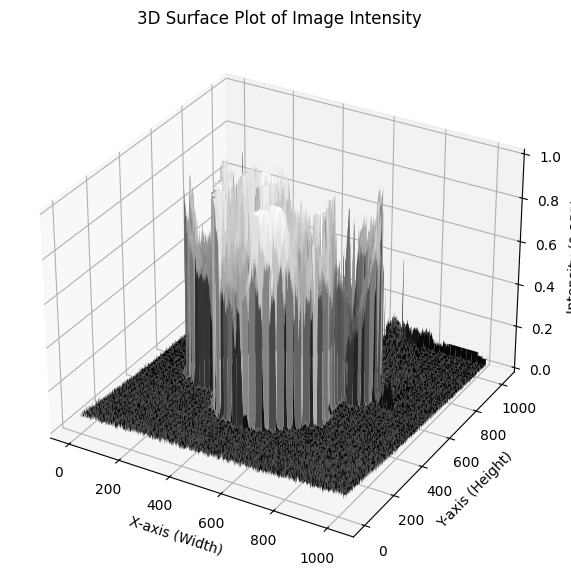

In [14]:
# Plot the 3D representation of the image with the z axis being the intensity function
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(0, image_array.shape[1])
Y = np.arange(0, image_array.shape[0]) 
X, Y = np.meshgrid(X, Y)
Z = image_array #* 255  # Scale back to 0-255 for better visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  
ax.plot_surface(X, Y, Z, cmap='gray')
ax.set_title("3D Surface Plot of Image Intensity")
ax.set_xlabel("X-axis (Width)")
ax.set_ylabel("Y-axis (Height)")
ax.set_zlabel("Intensity (0-255)")
plt.show()


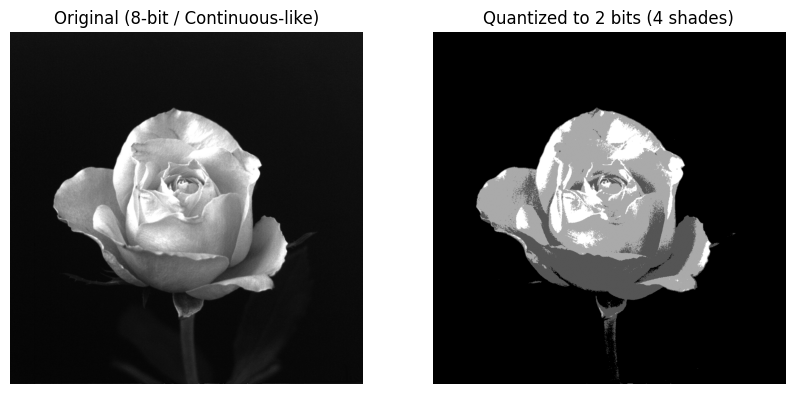

In [23]:
def reduce_quantization(img, num_bits):
    """
    Simulates lowering the bit depth (amplitude resolution).
    num_bits: Number of bits per pixel.
               8 bits = 256 shades (Standard)
               1 bit = 2 shades (Black & White only)
    """
    num_levels = 2 ** num_bits
    
    # 1. Scale from 0-1 up to 0-(levels-1)
    # 2. Round to nearest integer (The Quantization Step)
    # 3. Scale back down to 0-1
    quantized_img = np.round(img * (num_levels - 1)) / (num_levels - 1)
    
    return quantized_img

# --- EXPERIMENT ---
bits = 2 # Try changing this to 1, 2, 4, 8

low_bit_rose = reduce_quantization(image_array, bits)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original (8-bit / Continuous-like)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(low_bit_rose, cmap='gray')
plt.title(f"Quantized to {bits} bits ({2**bits} shades)")
plt.axis('off')

plt.show()

ipywidgets not found. Running static demo.


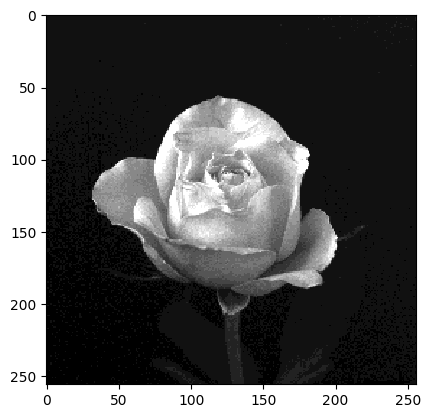

In [28]:
#"""
def retro_camera_simulator(img, sampling_factor, num_bits, bit_depth=4):
    # 1. Sample (Spatial)
    step1 = reduce_sampling(img, sampling_factor)
    
    # 2. Quantize (Amplitude)
    step2 = reduce_quantization(step1, num_bits)
    
    return step2

print("ipywidgets not found. Running static demo.")
result = retro_camera_simulator(image_array, sampling_factor=4, num_bits=4, bit_depth=4)
plt.imshow(result, cmap='gray', interpolation='nearest')
plt.show()
#"""